Hola **Estela**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>


Deberás realizar un análisis exploratorio de datos. Al final de Jupyter Notebook, escribe:

una lista de preguntas aclaratorias;
un plan aproximado para resolver la tarea, que especifica de 3 a 5 pasos básicos y los explica en uno o dos enunciados.
El líder del equipo revisará tus preguntas y plan de trabajo. Las preguntas serán respondidas durante una videollamada. El código será revisado por el líder del equipo solo si hay algunas dudas.

# Interconnect 

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

# Plan de trabajo 

- Descargar y limpiar datos. 
- Análisis exploratorio de datos (EDA)
- Observar y clasificar datos que puedan ser utiles para el analisís, borrar columnas innecesarias, cambiar tipo de datos si es necesario. 
- Entrenar distientos modelos
        - Separar conjunto de entrenamiento y prueba
        - Probar con distintos hiperparámetros
        - Determinar la metrica AUC-ROC y exactitud para cada modelo
        - Comparar metricas 
        - Conclusiones 

- ¿Cúal es la duración de los clientes promedio? 
- ¿Cuántas veces hablan a la linea de soporte técnico antes de cancelar su servicio? 
- ¿Cuales suelen ser las quejas o problemas que tienen cuando hablan a soporte técnico? ¿Se resolvieron?
- ¿Los precios son competitivos?
- ¿con que servicios cuenta la mayoria de los clientes? ¿de los clientes que cancelan con que servicios contaban?


In [19]:
#instalar catboost
!pip install catboost


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [20]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.5 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 25.1
    Uninstalling pip-25.1:
      Successfully uninstalled pip-25.1


In [21]:
!pip install lightgbm

In [22]:
!pip install xgboost

In [23]:
import pandas as pd
import numpy as np 
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

In [24]:
contract = pd.read_csv('https://raw.githubusercontent.com/IreneRA/TripleTen-LatAm/16-final/contract.csv')
internet = pd.read_csv('https://raw.githubusercontent.com/IreneRA/TripleTen-LatAm/16-final/internet.csv')
personal = pd.read_csv('https://raw.githubusercontent.com/IreneRA/TripleTen-LatAm/16-final/personal.csv')
phone = pd.read_csv('https://raw.githubusercontent.com/IreneRA/TripleTen-LatAm/16-final/phone.csv')

In [25]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [26]:
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [27]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [28]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [29]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [31]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [32]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo desarrollando el plan de trabajo para tu proyecto Final!
    
Recuerda que debes tener un EDA claro con las gráficas y conclusiones adecuadas así cómo revisar por el balance de las clases a predecir y de ser necesario modifica los parámetros de los modelos para manejar el desbalance o aplica algún método de balanceo cómo oversample o undersample, también, procura evaluar las predicciones de tus modelos con el conjunto de prueba y de entrenamiento, si tienes un valor alto de tus métricas (f1-score, accuracy, etc) en el conjunto de entrenamiento pero bajo en el de prueba quiere decir que tu modelo se está sobre ajustando y debes modificar su entrenamiento para mitigar esto, te recomendaría tener cómo umbral un 0.75 de f1-score para saber si tu modelo es bueno con las predicciones, también puedes hacer una prueba de cordura con un DummyClassifier. Recuerda que debes revisar si el modelo a crear es de regresión o clasificación.
     
Saludos!
</div>

In [34]:
#unir todas la tablas en la columna 'customerID
data = contract.merge(internet, how='left', on='customerID')
data = data.merge(personal, how='left', on='customerID')
data = data.merge(phone, how='left', on='customerID')

data

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


In [35]:
#creamos una nuwva columna para objetivo enddate 
data['Target'] = (data['EndDate'] != "No").astype("int")
data['Target']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Target, Length: 7043, dtype: int64

In [36]:
data['InternetService'] = data['InternetService'].fillna('NaN')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el análisis inicial y el procesamiento de tus datos, es clave tener los datos adecuados para poder tener análisis y entrenamientos correctos
</div>

In [38]:
data['Target'].value_counts()

Target
0    5174
1    1869
Name: count, dtype: int64

5174 usuarios no cuentan con una fecha de finalización de contrato mientras que, 
1869 si lo hacen 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, siempre en problemas de clasificación hay que revisar el balance en las clases a predecir ya que de esto dependerá los modelos a escoger o las técnicas a aplicar
</div>

In [40]:
#ordenar fechas
data = data.sort_values('BeginDate')

In [41]:
#contratos finalizados 
end_date = data[data['EndDate'] != 'No'].copy()
end_date['EndDate'] = pd.to_datetime(end_date['EndDate'])
end_date['EndDate'].head(20).unique()

<DatetimeArray>
['2019-10-01 00:00:00', '2019-11-01 00:00:00', '2020-01-01 00:00:00',
 '2019-12-01 00:00:00']
Length: 4, dtype: datetime64[ns]

In [42]:
data['BeginDate'] = pd.to_datetime(data['BeginDate'], errors='coerce')
data['EndDate'] = pd.to_datetime(data['EndDate'], errors='coerce')

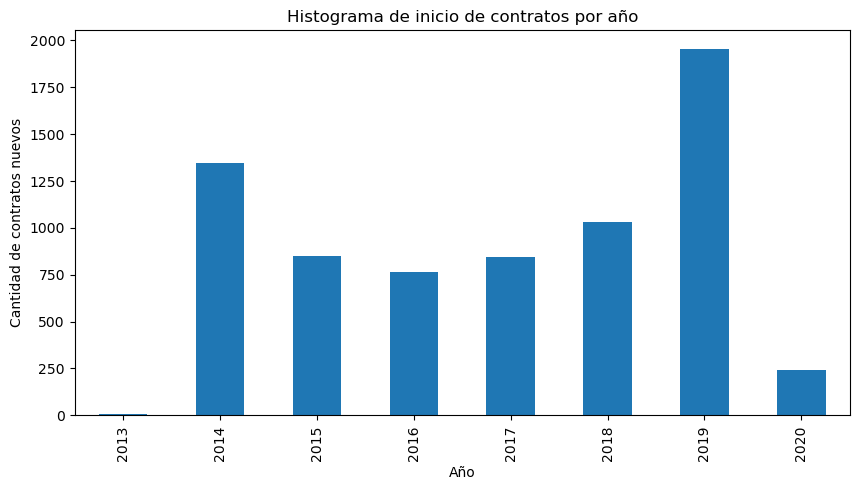

In [43]:
plt.figure(figsize=(10,5))
data['BeginDate'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Histograma de inicio de contratos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de contratos nuevos')
plt.show()

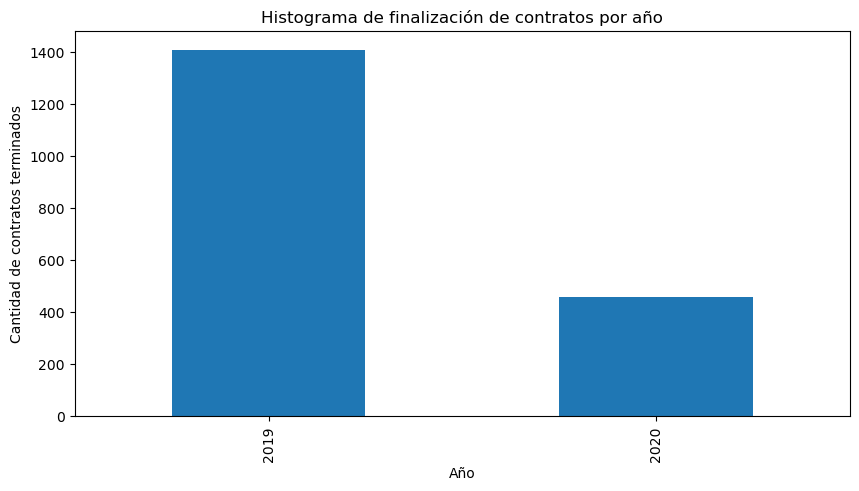

In [44]:
plt.figure(figsize=(10,5))
data['EndDate'].dropna().dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Histograma de finalización de contratos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de contratos terminados')
plt.show()

podemos obsevar en los histogramas que la empresa tuvo su mayor número de contrataaciones de servicios en el 2019, alrededor de 1900 nuevos usuarios en solo ese año, sin embargo también en ese año fue cuando sucedió la mayor cantidad de cancelaciones, alrededor de 1400 usuarios cancelaron, el 73% de los usuarios que contrataron ese mismo año 

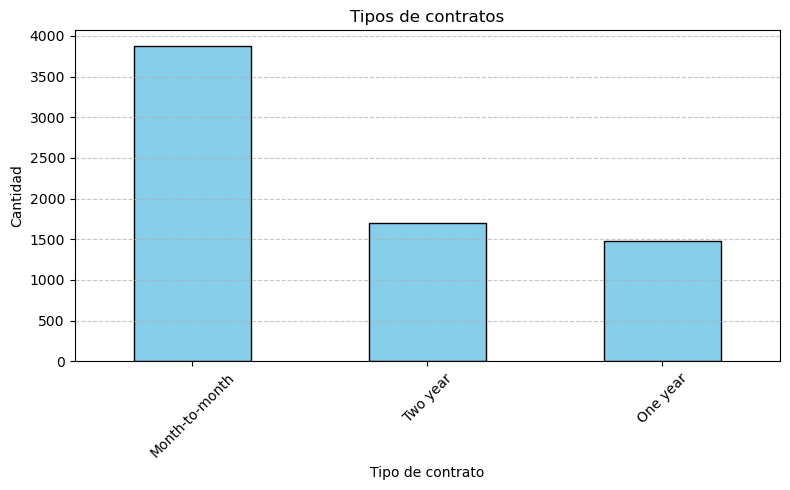

In [46]:
type_counts = data['Type'].value_counts()

plt.figure(figsize=(8,5))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Tipos de contratos')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La mayoria de los contraros son de mes con mes, quizás eso hace muy fácil que la gente deje de pagar y pueda irse a otra compania. Yo pienso que hay que promoveer que la gente haga sus contratos por año o deficnitivamente quitar la opción de contratar mes con mes 

### Correlación entre las finalizaciónes de contrarto y el tipo de contrato mes con mes 

In [49]:
#crear columna booleana si la fecha de finalizacón esta en 2019 
data['EndedIn2019'] = data['EndDate'].dt.year == 2019
#crear columna booleana para tipo de contraro mes con mes
data['IsMonthToMonth'] = data['Type'] == 'Month-to-month'

correlation = data[['EndedIn2019', 'IsMonthToMonth']].corr()
print(correlation)

                EndedIn2019  IsMonthToMonth
EndedIn2019        1.000000        0.333026
IsMonthToMonth     0.333026        1.000000


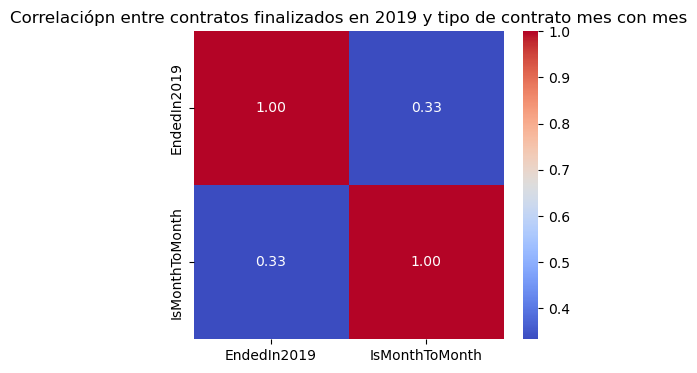

In [50]:
plt.figure(figsize=(5,4))
sns.heatmap(data[['EndedIn2019', 'IsMonthToMonth']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciópn entre contratos finalizados en 2019 y tipo de contrato mes con mes')
plt.show()

podemos ver que realmente la correlación de las cancelaciones al menos en cuanto a las cancelaciones en 2019

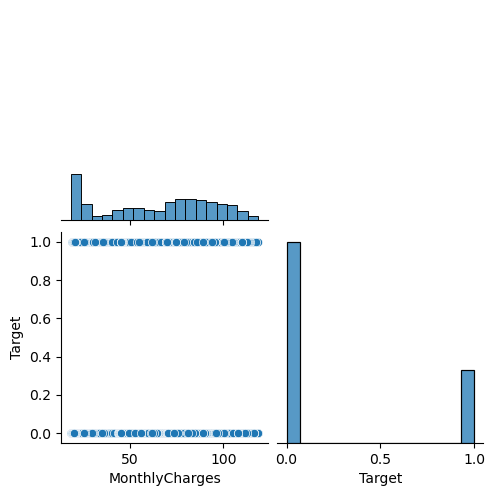

In [52]:
sns.pairplot(data[['MonthlyCharges', 'TotalCharges', 'Target']],corner=True)
plt.show()

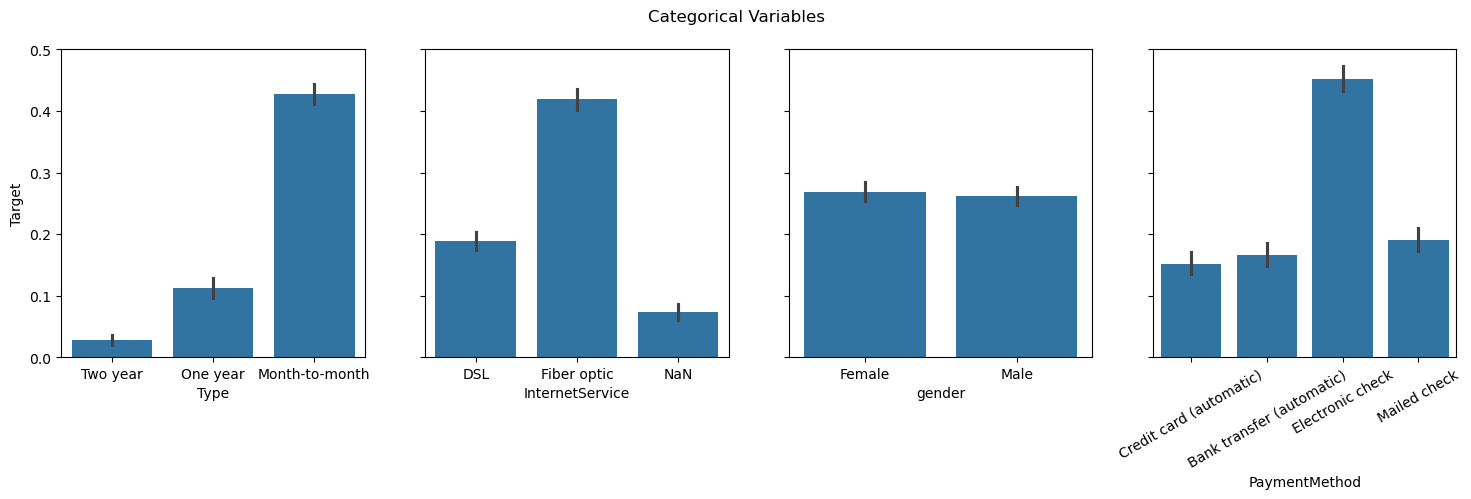

In [53]:

fig, axes = plt.subplots(1, 4, figsize=(18, 4), sharey=True)
fig.suptitle('Categorical Variables')

sns.barplot(ax=axes[0], data=data, x='Type', y='Target')
sns.barplot(ax=axes[1], data=data, x='InternetService', y='Target')
sns.barplot(ax=axes[2], data=data, x='gender', y='Target')
sns.barplot(ax=axes[3], data=data, x='PaymentMethod', y='Target')
plt.xticks(rotation=30)
plt.ylim(0,0.5)
plt.show()

Cuando vemos los datos generales, podemos ver que las personas que más cancelas contratos son:

    - las que tienen contratos mes con mes,
    - las que tienen contratos de intenet de fibra optica 
    - las que tienen como método de pago cheque electronico

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente trabajo con el EDA de tus dataset, tienes un análisis súper detallado sobre cómo pueden verse relacionadas las diferentes variables en tu dataset con la variable objetivo predecir lo cual es un importante hallazgo antes de pasar a cualquier entrenamiento
</div>

## Entrenamiento de modelos

preparamos datos con las columnas de nuestro interes que son el método de pago y el tipo de contrato 

In [57]:
#agrupar categorías de columna según el método de pago 
data.loc[data['PaymentMethod'] != 'Electronic check', 'PaymentMethod'] = 'Others'
data['PaymentMethod'].unique()

array(['Others', 'Electronic check'], dtype=object)

In [58]:
#agrupar categorías de columna según el tipo de contrato 
data.loc[data['Type'] != 'Month-to-month', 'Type'] = 'Year contact'
data['Type'].unique()

array(['Year contact', 'Month-to-month'], dtype=object)

In [59]:
#eliminamos columnas innecesarias para el entrenamiento del modelo
data = data.drop(columns=['customerID', 'gender'], axis =1)

### Separar carácteristicas de entrenamiento y prueba

In [61]:
#separar características de objetivo
features = data.drop(['Target'],axis=1)
target = data['Target']

#separar conjunto de entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, shuffle=False)

### Balanceo de variables para modelo

In [63]:
#función para balancear datos con SMOTE

features_train_numeric = features_train.select_dtypes(include=['number'])
#convertir variables categoricas a variables númericas
features_train_encoded = pd.get_dummies(features_train_numeric)


smote = SMOTE(random_state=42)
features_train_smote, target_train_smote = smote.fit_resample(features_train_encoded, target_train)

#mostrar la nueva distribución
print('Distribución original:', Counter(target_train))
print('Distribución con SMOTE:', Counter(target_train_smote))

Distribución original: Counter({0: 4707, 1: 1631})
Distribución con SMOTE: Counter({1: 4707, 0: 4707})


In [64]:
#escalar datos
scaler= StandardScaler()
#ajustar fit solo para conjunto de entrenamiento
features_train_smote_scaled = scaler.fit_transform(features_train_smote)
#transformar conjunto de prueba 
features_test_encoded = pd.get_dummies(features_test)
features_test_encoded = features_test_encoded.reindex(columns=features_train_encoded.columns, fill_value=0)

features_test_scaled = scaler.transform(features_test_encoded)



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste el procesamiento y división adecuada para una evaluación correcta del desempeño de tus modelos
</div>

## Entrenamiento de modelos

In [66]:
#Definimos modelos

logistic = LogisticRegression(max_iter= 100, random_state = 42)
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [67]:
#hacemos validación cruzada 

for model, name in zip([logistic, random_forest, xgb], ['Logistic Regression', 'Random Forest', 'XGBoost']):
    scores = cross_val_score(model, features_train_smote_scaled, target_train_smote, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy promedio: {scores.mean():.4f}")



Logistic Regression - Accuracy promedio: 0.6052
Random Forest - Accuracy promedio: 0.6811
XGBoost - Accuracy promedio: 0.6444


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

In [68]:
for model, name in zip([logistic, random_forest, xgb], ['Logistic Regression', 'Random Forest', 'XGBoost']):
    scores = cross_val_score(model, features_train_smote_scaled, target_train_smote, cv=5, scoring='roc_auc')
    print(f"{name} - AUC-ROC promedio: {scores.mean():.4f}")

Logistic Regression - AUC-ROC promedio: 0.6428
Random Forest - AUC-ROC promedio: 0.7382
XGBoost - AUC-ROC promedio: 0.6994


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:36:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

## GridSearchCV

### Losgistic Regression

In [90]:
#buscamos mejores hiperparametros

param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],  # Regularización
    'solver': ['liblinear', 'lbfgs']
}

grid_logistic = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                             param_grid_logistic,
                             cv=5,
                             scoring='roc_auc',
                             n_jobs=-1)

grid_logistic.fit(features_train_smote_scaled, target_train_smote)


print("Mejores parámetros Logistic:", grid_logistic.best_params_)
print("Mejor AUC-ROC Logistic:", grid_logistic.best_score_)


Mejores parámetros Logistic: {'C': 0.01, 'solver': 'lbfgs'}
Mejor AUC-ROC Logistic: 0.6430067462632152


In [94]:
y_train_pred_proba = grid_logistic.predict_proba(features_train_smote_scaled)[:, 1]
y_test_pred_proba = grid_logistic.predict_proba(features_test_scaled)[:, 1]

# Calcular AUC-ROC
auc_train = roc_auc_score(target_train_smote, y_train_pred_proba)
auc_test = roc_auc_score(target_test, y_test_pred_proba)

print("AUC-ROC Entrenamiento:", auc_train)
print("AUC-ROC Prueba:", auc_test)

AUC-ROC Entrenamiento: 0.6469738081352695
AUC-ROC Prueba: 0.683938243391575


### Random Forest

In [73]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5,
                       scoring='roc_auc',
                       n_jobs=-1)

grid_rf.fit(features_train_smote_scaled, target_train_smote)

print("Mejores parámetros RF:", grid_rf.best_params_)
print("Mejor AUC-ROC RF:", grid_rf.best_score_)

Mejores parámetros RF: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Mejor AUC-ROC RF: 0.7452796244456493


In [96]:
y_train_pred_proba = grid_rf.predict_proba(features_train_smote_scaled)[:, 1]
y_test_pred_proba = grid_rf.predict_proba(features_test_scaled)[:, 1]

# Calcular AUC-ROC
auc_train = roc_auc_score(target_train_smote, y_train_pred_proba)
auc_test = roc_auc_score(target_test, y_test_pred_proba)

print("AUC-ROC Entrenamiento:", auc_train)
print("AUC-ROC Prueba:", auc_test)

AUC-ROC Entrenamiento: 0.9261194188496231
AUC-ROC Prueba: 0.6179934500566823


### XGBoost

In [76]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)

grid_xgb.fit(features_train_smote_scaled, target_train_smote)

print("Mejores parámetros XGB:", grid_xgb.best_params_)
print("Mejor AUC-ROC XGB:", grid_xgb.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Mejores parámetros XGB: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Mejor AUC-ROC XGB: 0.7014090735494338


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Mejores parámetros XGB: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Mejor AUC-ROC XGB: 0.7014090735494338

In [98]:
y_train_pred_proba = grid_xgb.predict_proba(features_train_smote_scaled)[:, 1]
y_test_pred_proba = grid_xgb.predict_proba(features_test_scaled)[:, 1]

# Calcular AUC-ROC
auc_train = roc_auc_score(target_train_smote, y_train_pred_proba)
auc_test = roc_auc_score(target_test, y_test_pred_proba)

print("AUC-ROC Entrenamiento:", auc_train)
print("AUC-ROC Prueba:", auc_test)

AUC-ROC Entrenamiento: 0.7577805300983953
AUC-ROC Prueba: 0.6542700592014109


## Cat Booster Classifier 

In [79]:
cat_model = CatBoostClassifier(
    verbose=0,
    random_state=42,
    eval_metric='AUC',
   
)

# Hiperparámetros para búsqueda
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8]
}

# GridSearchCV para encontrar mejores parámetros
grid_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Entrenar con los datos
grid_cat.fit(features_train_smote_scaled, target_train_smote)

# Imprimir resultados
print("Mejores parámetros CatBoost:", grid_cat.best_params_)
print("Mejor AUC–ROC promedio (CV):", grid_cat.best_score_)

Mejores parámetros CatBoost: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
Mejor AUC–ROC promedio (CV): 0.6996843869935159


In [ ]:
y_train_pred_proba = grid_cat.predict_proba(features_train_smote_scaled)[:, 1]
y_test_pred_proba = grid_cat.predict_proba(features_test_scaled)[:, 1]

# Calcular AUC-ROC
auc_train = roc_auc_score(target_train_smote, y_train_pred_proba)
auc_test = roc_auc_score(target_test, y_test_pred_proba)

print("AUC-ROC Entrenamiento:", auc_train)
print("AUC-ROC Prueba:", auc_test)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Vas por buen camino con la parte de los entrenamientos, te recomendaría utilizar `classification_report` ya que este te da más información del desempeño del modelo para las clases a predecir, en este caso al ser el problema de predicción de churn es importante que las predicciones de la clase minoritari sean correctas.
    
Y no olvides que debes redactar tus conclusiones finales del proyecto al final del mismo.
</div>

## Classification Report 

In [102]:
from sklearn.metrics import classification_report

modelos = [
    ('Logistic Regression', logistic),
    ('Random Forest', random_forest),
    ('XGBoost', xgb)
]

for nombre, modelo in modelos:
    modelo.fit(features_train_smote_scaled, target_train_smote)
    
    print(f"\n{nombre}")
    
    print("Entrenamiento:")
    print(classification_report(target_train_smote, modelo.predict(features_train_smote_scaled)))
    
    print("Prueba:")
    print(classification_report(target_test, modelo.predict(features_test_scaled)))


Logistic Regression
Entrenamiento:
              precision    recall  f1-score   support

           0       0.62      0.57      0.59      4707
           1       0.60      0.65      0.62      4707

    accuracy                           0.61      9414
   macro avg       0.61      0.61      0.61      9414
weighted avg       0.61      0.61      0.61      9414

Prueba:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       467
           1       0.54      0.35      0.42       238

    accuracy                           0.68       705
   macro avg       0.63      0.60      0.60       705
weighted avg       0.66      0.68      0.66       705


Random Forest
Entrenamiento:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4707
           1       0.88      0.85      0.87      4707

    accuracy                           0.87      9414
   macro avg       0.87      0.87      0.87      9414


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:30:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Conclusión

Random Forest
AUC-ROC Entrenamiento: 0.9261194188496231
AUC-ROC Prueba: 0.6179934500566823

El modelo que nos arrojó un mejor AUC-ROC de entrnenamiento fue el de Random Fprest con AUC-ROC - 0.92 y en cuanto accuracy, F1 y precisión también fue el modelo que mejores puntajes tuvo, arriba de 0.8 a diferencia de los otros modelos que nos arrojaron precisiones mucho más bajas. 

¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?

primero se hizo una análisis de los datos, buscando tendencias, en que fechas se hicieron el mayor numero de cancelaciones, se busco correlacion entre algunas variables como el tipo de contrato y cuantos de esos clientes cancelaron. 

También se analizó si habían valores ausentes y si eran de mucha relevancia para la información del proyecto 
finalemnte se limpiaron las columnas que no se necesitaban para los modelos y se agregó una columna extra que es 'Target' que es binaria 1 si cancelaron y 0 si no cancelaron 

¿Qué dificultades encontraste y cómo lograste resolverlas?

al principio solo me AUC ROC demasiado bajo, tuve que mover otras variables, y probar más modelos para mejorar el AUC ROC

¿Cuáles fueron algunos de los pasos clave para resolver la tarea?

primero entedender el problema y hacer un análisi  con la información que se tiene de los datos.
con esta información se busca la columna objetivo y que otras columnas pueden estar correlacionadas y afectando a la columna objetivo 
despues se debía hacer un balance de los datos con SMOTE para que el modelo tenga suficiente información para predecir de manera más excata quienes iban a cancelar 
tabien se escalaron los datos y finalmente se corrieron los modelos. 

¿Cuál es tu modelo final y qué nivel de calidad tiene?


Random Forest
AUC-ROC Entrenamiento: 0.9261194188496231
AUC-ROC Prueba: 0.6179934500566823
